<a href="https://colab.research.google.com/github/ErnestoMedina99/CNF-LXII/blob/master/Voice_Activated_Medical_Assistant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [ ]:
pip install pyttsx3

In [ ]:
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libasound2-dev is already the newest version (1.1.3-5ubuntu0.6).
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 40 not upgraded.
Need to get 184 kB of archives.
After this operation, 891 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudiocpp0 amd64 19.6.0-1 [15.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 portaudio19-dev amd64 19.6.0-1 [104 kB]
Fetched 184 kB in 1s (176 kB/s)
Selecting pr

In [ ]:
pip install pyaudio

  Using cached PyAudio-0.2.11.tar.gz (37 kB)
  Created wheel for pyaudio: filename=PyAudio-0.2.11-cp37-cp37m-linux_x86_64.whl size=52601 sha256=ddfd5cdad3d413b12ac4eed2869fd2ef955c9ffd7da95ee9d16af894dd988c1f
  Stored in directory: /root/.cache/pip/wheels/40/2e/4c/b71e7e96c861a46e6213bc6bb482b94dcf293a92c5e736c1ec
Successfully built pyaudio


In [ ]:
pip install google-api-python-client

In [ ]:
pip install speechrecognition

     |████████████████████████████████| 32.8 MB 36 kB/s 


In [ ]:
pip install neuralintents

# Preprocessing the data

In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nltk.corpus import stopwords

In [192]:
#Importing the data
d1 = pd.read_excel('/content/drive/MyDrive/Python/Proyecto EMFUTECH MIRAI/Dataset/Algoritmo BLS- Equipo verde.xlsx')
d2 = pd.read_excel('/content/drive/MyDrive/Python/Proyecto EMFUTECH MIRAI/Dataset/Algoritmo BLS-Equipo Rojo.xlsx')
d3 = pd.read_excel('/content/drive/MyDrive/Python/Proyecto EMFUTECH MIRAI/Dataset/Eq. Amarillo-Base de datos BLS-TELESALUD.xlsx')
d4 = pd.read_excel('/content/drive/MyDrive/Python/Proyecto EMFUTECH MIRAI/Dataset/Equipo Blanco - Algoritmo BLS.xlsx')
d5 = pd.read_excel('/content/drive/MyDrive/Python/Proyecto EMFUTECH MIRAI/Dataset/Equipo Morado - Entrenamiento del Algoritmo.xlsx')
d6 = pd.read_excel('/content/drive/MyDrive/Python/Proyecto EMFUTECH MIRAI/Dataset/Equipo Rosa Algoritmo BLS.xlsx')
d7 = pd.read_excel('/content/drive/MyDrive/Python/Proyecto EMFUTECH MIRAI/Dataset/Equipo azul - Algoritmo BLS.xlsx')

In [193]:
#Looking the data
print('Equipo verde:')
d1

Equipo verde:


,Patient ID,Gender,Patient Age,Breathing Status,Emergency,Response,Pulse,Defribilator,Return response,Last step,Output
0,1,F,17,Unnormal,Yes,Responsive,No,Yes,Yes,0,3
1,2,F,19,Normal,Yes,Responsive,Yes,No,Yes,3,2
2,3,M,57,Unnormal,Yes,Responsive,Yes,No,Yes,3,3
3,4,M,34,Unnormal,Yes,Unresponsive,No,Yes,No,1,1
4,5,M,52,Unnormal,Yes,Unresponsive,No,Yes,No,1,1
5,6,F,42,Unnormal,Yes,Responsive,Yes,No,Yes,3,1
6,7,M,31,Normal,Yes,Responsive,Yes,No,Yes,3,1
7,8,F,26,Unnormal,Yes,Responsive,No,Yes,Yes,1,2
8,9,M,18,Normal,Yes,Unresponsive,No,Yes,No,2,3
9,10,M,58,Normal,Yes,Responsive,Yes,No,Yes,3,1


In [194]:
print('Equipo rojo:')
d2

Equipo rojo:


,Patient ID,Gender,Patient Age,Breathing Status,Emergency,Response,Pulse,Defibrillator,Return Respond,Last Step,Output
0,1,Female,18,Unnormal,Y,Responsive,Yes,No,No,1,2
1,2,Male,24,Normal,N,N,N,N,N,0,2
2,3,Female,32,Unnormal,Y,Unresponsive,NP,Yes,Yes,2,3
3,4,Male,43,Unnormal,Y,Unresponsive,NP,Yes,No,4,5
4,5,Female,21,Unnormal,Y,Unresponsive,NP,Yes,Yes,2,3
5,6,Male,19,Unnormal,Y,Responsive,Yes,No,No,3,0
6,7,Male,22,Normal,N,N,N,N,N,0,2
7,8,Female,56,Unnormal,Y,Unresponsive,Yes,No,No,1,2
8,9,Female,76,Unnormal,Y,Unresponsive,NP,Yes,Yes,2,3
9,10,Male,65,Unnormal,Y,Responsive,Yes,No,No,1,2


In [195]:
print('Equipo amarillo:')
d3

Equipo amarillo:


,Patient ID,Gender,Patient Age,Breathing Status,Emergency,Response,Pulse,Defibrillator,Return respond,Last step,Output (recomendation)
0,1,Male,23,U,yes,Responsive,NP,Yes,N,5,6
1,2,Male,44,Unnormal,yes,Responsive,P,Yes,Y,3,4
2,3,Female,24,U,yes,Unresponsive,No-pulse,No,Null,2,3
3,4,Male,62,Normal,NaN,Responsive,Pulse,No,Null,2,3
4,5,Female,26,N,NaN,Unresponsive,No-pulse,Null,No,4,5
5,6,Male,18,Unnormal,yes,Responsive,Pulse,No,N,2,3
6,7,Female,19,N,yes,Null,NP,Null,No,2,3
7,8,Male,32,Normal,NaN,Responsive,Pulse,No,Null,2,3
8,9,Female,45,Unnormal,yes,Responsive,No-pulse,Yes,No,4,5
9,10,Female,32,N,NaN,Responsive,No-pulse,Yes,Y,5,6


In [196]:
print('Equipo blanco:')
d4

Equipo blanco:


,ID del paciente,Género,Edad,Estado respiratorio,Emergencia,Respuesta,Pulso,Desfibrilador,Respuesta de vuelta,Ultimo paso,Producto
0,1,F,24,Normal,Nulo,Nulo,Nulo,Nulo,Nulo,0,NaN
1,2,M,29,Anormal,Si,No responde,NP,Si,No,4,5.0
2,3,M,20,Anormal,Si,No responde,NP,Si,No,4,5.0
3,4,F,25,Anormal,Si,No responde,NP,Si,Si,5,6.0
4,5,F,30,Anormal,Si,No responde,NP,Si,Si,5,6.0
5,6,F,35,Normal,Nulo,Nulo,Nulo,Nulo,Nulo,0,NaN
6,7,M,19,Normal,Nulo,Nulo,Nulo,Nulo,Nulo,0,NaN
7,8,F,32,Anormal,Si,No responde,NP,Si,No,4,5.0
8,9,M,38,Anormal,Si,Rsponde,Si pulso,Si,Si,5,6.0
9,10,F,40,Normal,Nulo,Nulo,Nulo,Nulo,Nulo,0,NaN


In [197]:
print('Equipo morado:')
d5

Equipo morado:


,Patient ID,Gender,Patient Age,Breathing Status,Emergency,Response,Pulse,Defibrillator,Return respond,Last_step,Output (recomendation),Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,Fem,27,Normal,Null,Null,Null,Null,Null,0,1,NaN,NaN,NaN
1,2,Male,32,Unnormal,yes,Unresponsive,No-pulse,yes,No,4,5,NaN,NaN,NaN
2,3,Male,22,Unnormal,yes,Responsive,Pulse,Null,yes,2,3,NaN,NaN,NaN
3,4,Male,21,Normal,Null,Responsive,Pulse,Null,yes,0,1,NaN,NaN,NaN
4,5,Fem,18,Unnormal,yes,Unresponsive,No-pulse,yes,Null,4,5,NaN,NaN,NaN
5,6,Fem,20,Nomal,Null,Responsive,Pulse,NaN,yes,0,1,NaN,NaN,NaN
6,7,Male,25,Normal,Null,Responsive,Pulse,NaN,yes,0,1,NaN,NaN,NaN
7,8,Fem,36,unnormal,yes,responsive,Pulse,NaN,yes,2,3,NaN,NaN,NaN
8,9,M,40,no normal,no,responsive,Pulse,NaN,yes,1,2,NaN,NaN,NaN
9,10,Male,58,Unnormal,yes,Unresponsive,Null,yes,Null,6,7,NaN,NaN,NaN


In [198]:
print('Equipo rosa:')
d6

Equipo rosa:


,Patient ID,Gender,Patient age,Breathing Status,Emergency,Response,Pulse,Defibrillator,Return Response,Last step,Output (recommendation)
0,1,Fem,27,Normal,Null,Null,Null,Null,Null,0,1
1,2,Male,40,unnormal,yes,unresponsive,no pulse,yes,no,4,5
2,3,Fem,22,unnormal,yes,responsive,pulse,no,no,2,3
3,4,Male,54,unnormal,yes,unresponsive,no pulse,yes,yes,5,6
4,5,Male,32,unnormal,yes,unresponsive,no pulse,yes,no,4,5
5,6,Fem,78,unnormal,yes,unresponsive,no pulse,yes,yes,5,6
6,7,Male,54,unnormal,yes,responsive,pulse,no,no,2,3
7,8,Fem,23,unnormal,yes,unresponsive,no pulse,yes,no,4,5
8,9,Fem,56,unnormal,yes,responsive,pulse,no,no,2,3
9,10,Fem,32,unnormal,yes,unresponsive,no pulse,yes,yes,5,6


In [199]:
print('Equipo azul:')
d7

Equipo azul:


,Patient ID,Gender,Patient Age,Breathing Status,Emergency,Response,Pulse,Defibrillator,Return respond,Last_step,Output (recomendation)
0,1,fema,41.0,Unnormal,yes,Responsivee,Pulse,No,No,0.0,2.0
1,2,Female,24.0,Unnormal,no,Unresponsive,No pulse,Yes,Yes,4.0,5.0
2,3,Male,64.0,Normal,no,Unresponsive,No pulse,Yes,Yes,4.0,5.0
3,4,Male,30.0,Unnormal,no,Unresponsive,No pulse,Yes,No,2.0,3.0
4,5,Female,22.0,Unnormal,yes,Unresponsive,No pulse,Yes,Yes,4.0,5.0
5,6,Male,54.0,Normal,yes,Responsivee,pulse,No,Null,0.0,1.0
6,7,Female,66.0,Normal,yes,Unresponsive,No pulse,Yes,Yes,5.0,6.0
7,8,Female,18.0,Normal,no,Responsivee,pulse,No,No,4.0,5.0
8,9,Male,47.0,Normal,yes,Unresponsive,No pulse,Yes,Yes,5.0,6.0
9,10,Female,80.0,Unnormal,yes,Unresponsive,No pulse,Yes,No,4.0,5.0


The only necessary inputs for the BLS algorithm are: breathing status, responsive, pulse and defibrilator.

In [200]:
#Dropping the other unnecessary columns
d1.drop(['Patient ID', 'Gender', 'Patient Age', 'Emergency', 'Return response',	'Last step',	'Output'], axis = 1, inplace = True)
d2.drop(['Patient ID',	'Gender',	'Patient Age', 'Emergency',	'Return Respond',	'Last Step',	'Output'], axis = 1, inplace = True)
d3.drop(['Patient ID',	'Gender',	'Patient Age',	'Emergency',	'Return respond',	'Last step',	'Output (recomendation)'], axis = 1, inplace = True)
d4.drop(['ID del paciente',	'Género', 'Edad ',	'Emergencia',	'Respuesta de vuelta',	'Ultimo paso',	'Producto'], axis = 1, inplace = True)
d5.drop(['Patient ID', 'Gender', 'Patient Age', 'Emergency ', 'Return respond', 'Last_step ', 'Output (recomendation)', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'], axis = 1, inplace = True)
d6.drop(['Patient ID', 'Gender', 'Patient age', 'Emergency', 'Return Response', 'Last step', 'Output (recommendation)'], axis = 1, inplace = True)
d7.drop(['Patient ID', 'Gender', 'Patient Age', 'Emergency ', 'Return respond', 'Last_step ', 'Output (recomendation)'], axis = 1, inplace = True)

Cleaning data

In [201]:
#Looking the data
print('Equipo verde:')
d1

Equipo verde:


,Breathing Status,Response,Pulse,Defribilator
0,Unnormal,Responsive,No,Yes
1,Normal,Responsive,Yes,No
2,Unnormal,Responsive,Yes,No
3,Unnormal,Unresponsive,No,Yes
4,Unnormal,Unresponsive,No,Yes
5,Unnormal,Responsive,Yes,No
6,Normal,Responsive,Yes,No
7,Unnormal,Responsive,No,Yes
8,Normal,Unresponsive,No,Yes
9,Normal,Responsive,Yes,No


In [202]:
print('Equipo rojo:')
d2

Equipo rojo:


,Breathing Status,Response,Pulse,Defibrillator
0,Unnormal,Responsive,Yes,No
1,Normal,N,N,N
2,Unnormal,Unresponsive,NP,Yes
3,Unnormal,Unresponsive,NP,Yes
4,Unnormal,Unresponsive,NP,Yes
5,Unnormal,Responsive,Yes,No
6,Normal,N,N,N
7,Unnormal,Unresponsive,Yes,No
8,Unnormal,Unresponsive,NP,Yes
9,Unnormal,Responsive,Yes,No


In [203]:
print('Equipo amarillo:')
d3

Equipo amarillo:


,Breathing Status,Response,Pulse,Defibrillator
0,U,Responsive,NP,Yes
1,Unnormal,Responsive,P,Yes
2,U,Unresponsive,No-pulse,No
3,Normal,Responsive,Pulse,No
4,N,Unresponsive,No-pulse,Null
5,Unnormal,Responsive,Pulse,No
6,N,Null,NP,Null
7,Normal,Responsive,Pulse,No
8,Unnormal,Responsive,No-pulse,Yes
9,N,Responsive,No-pulse,Yes


In [204]:
print('Equipo blanco:')
d4

Equipo blanco:


,Estado respiratorio,Respuesta,Pulso,Desfibrilador
0,Normal,Nulo,Nulo,Nulo
1,Anormal,No responde,NP,Si
2,Anormal,No responde,NP,Si
3,Anormal,No responde,NP,Si
4,Anormal,No responde,NP,Si
5,Normal,Nulo,Nulo,Nulo
6,Normal,Nulo,Nulo,Nulo
7,Anormal,No responde,NP,Si
8,Anormal,Rsponde,Si pulso,Si
9,Normal,Nulo,Nulo,Nulo


In [205]:
print('Equipo morado:')
d5

Equipo morado:


,Breathing Status,Response,Pulse,Defibrillator
0,Normal,Null,Null,Null
1,Unnormal,Unresponsive,No-pulse,yes
2,Unnormal,Responsive,Pulse,Null
3,Normal,Responsive,Pulse,Null
4,Unnormal,Unresponsive,No-pulse,yes
5,Nomal,Responsive,Pulse,NaN
6,Normal,Responsive,Pulse,NaN
7,unnormal,responsive,Pulse,NaN
8,no normal,responsive,Pulse,NaN
9,Unnormal,Unresponsive,Null,yes


In [206]:
print('Equipo rosa:')
d6

Equipo rosa:


,Breathing Status,Response,Pulse,Defibrillator
0,Normal,Null,Null,Null
1,unnormal,unresponsive,no pulse,yes
2,unnormal,responsive,pulse,no
3,unnormal,unresponsive,no pulse,yes
4,unnormal,unresponsive,no pulse,yes
5,unnormal,unresponsive,no pulse,yes
6,unnormal,responsive,pulse,no
7,unnormal,unresponsive,no pulse,yes
8,unnormal,responsive,pulse,no
9,unnormal,unresponsive,no pulse,yes


In [207]:
print('Equipo azul:')
d7

Equipo azul:


,Breathing Status,Response,Pulse,Defibrillator
0,Unnormal,Responsivee,Pulse,No
1,Unnormal,Unresponsive,No pulse,Yes
2,Normal,Unresponsive,No pulse,Yes
3,Unnormal,Unresponsive,No pulse,Yes
4,Unnormal,Unresponsive,No pulse,Yes
5,Normal,Responsivee,pulse,No
6,Normal,Unresponsive,No pulse,Yes
7,Normal,Responsivee,pulse,No
8,Normal,Unresponsive,No pulse,Yes
9,Unnormal,Unresponsive,No pulse,Yes


In [208]:
#Getting rid of the Nan and Nulls
d1.dropna(inplace=True)
d2.dropna(inplace=True)
d3.dropna(inplace=True)
d4.dropna(inplace=True)
d5.dropna(inplace=True)
d6.dropna(inplace=True)
d7.dropna(inplace=True)

It looks like the Null (or nulo, as it was written in the spanish dataframe) is registered as a string, so it's necessary to look for another method that drops rows if certain string is in them.

In [209]:
d1.columns

Index(['Breathing Status', 'Response', 'Pulse', 'Defribilator'], dtype='object')

In [210]:
d1 = d1[d1["Breathing Status"].str.contains("Null|null|Nulo|nulo|NU")==False]
d1 = d1[d1["Response"].str.contains("Null|null|Nulo|nulo|NU")==False]
d1 = d1[d1["Pulse"].str.contains("Null|null|Nulo|nulo|NU")==False]
d1 = d1[d1["Defribilator"].str.contains("Null|null|Nulo|nulo|NU")==False]

In [211]:
d2.columns

Index(['Breathing Status', 'Response', 'Pulse', 'Defibrillator'], dtype='object')

In [212]:
d2 = d2[d2["Breathing Status"].str.contains("Null|null|Nulo|nulo|NU")==False]
d2 = d2[d2["Response"].str.contains("Null|null|Nulo|nulo|NU")==False]
d2 = d2[d2["Pulse"].str.contains("Null|null|Nulo|nulo|NU")==False]
d2 = d2[d2["Defibrillator"].str.contains("Null|null|Nulo|nulo|NU")==False]

In [213]:
d3.columns

Index(['Breathing Status', 'Response', 'Pulse', 'Defibrillator'], dtype='object')

In [214]:
d3 = d3[d3["Breathing Status"].str.contains("Null|null|Nulo|nulo|NU")==False]
d3 = d3[d3["Response"].str.contains("Null|null|Nulo|nulo|NU")==False]
d3 = d3[d3["Pulse"].str.contains("Null|null|Nulo|nulo|NU")==False]
d3 = d3[d3["Defibrillator"].str.contains("Null|null|Nulo|nulo|NU")==False]

In [215]:
d4.columns

Index(['Estado respiratorio', 'Respuesta', 'Pulso', 'Desfibrilador'], dtype='object')

In [216]:
d4 = d4[d4["Estado respiratorio"].str.contains("Null|null|Nulo|nulo|NU")==False]
d4 = d4[d4["Respuesta"].str.contains("Null|null|Nulo|nulo|NU")==False]
d4 = d4[d4["Pulso"].str.contains("Null|null|Nulo|nulo|NU")==False]
d4 = d4[d4["Desfibrilador"].str.contains("Null|null|Nulo|nulo|NU")==False]

In [217]:
d5.columns

Index(['Breathing Status', 'Response', ' Pulse', 'Defibrillator'], dtype='object')

In [218]:
d5 = d5[d5["Breathing Status"].str.contains("Null|null|Nulo|nulo|NU|Nul")==False]
d5 = d5[d5["Response"].str.contains("Null|null|Nulo|nulo|NU|Nul")==False]
d5 = d5[d5[" Pulse"].str.contains("Null|null|Nulo|nulo|NU|Nul")==False]
d5 = d5[d5["Defibrillator"].str.contains("Null|null|Nulo|nulo|NU|Nul")==False]

In [219]:
d6.columns

Index(['Breathing Status', 'Response', 'Pulse', 'Defibrillator'], dtype='object')

In [220]:
d6 = d6[d6["Breathing Status"].str.contains("Null|null|Nulo|nulo|NU")==False]
d6 = d6[d6["Response"].str.contains("Null|null|Nulo|nulo|NU")==False]
d6 = d6[d6["Pulse"].str.contains("Null|null|Nulo|nulo|NU")==False]
d6 = d6[d6["Defibrillator"].str.contains("Null|null|Nulo|nulo|NU")==False]

In [221]:
d7.columns

Index(['Breathing Status', 'Response', ' Pulse', 'Defibrillator'], dtype='object')

In [222]:
d7 = d7[d7["Breathing Status"].str.contains("Null|null|Nulo|nulo|NU")==False]
d7 = d7[d7["Response"].str.contains("Null|null|Nulo|nulo|NU")==False]
d7 = d7[d7[" Pulse"].str.contains("Null|null|Nulo|nulo|NU")==False]
d7 = d7[d7["Defibrillator"].str.contains("Null|null|Nulo|nulo|NU")==False]

In [223]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [224]:
#Looking into the data
print('Equipo verde:')
d1

Equipo verde:


,Breathing Status,Response,Pulse,Defribilator
0,Unnormal,Responsive,No,Yes
1,Normal,Responsive,Yes,No
2,Unnormal,Responsive,Yes,No
3,Unnormal,Unresponsive,No,Yes
4,Unnormal,Unresponsive,No,Yes
5,Unnormal,Responsive,Yes,No
6,Normal,Responsive,Yes,No
7,Unnormal,Responsive,No,Yes
8,Normal,Unresponsive,No,Yes
9,Normal,Responsive,Yes,No


In [225]:
print('Equipo rojo:')
d2

Equipo rojo:


,Breathing Status,Response,Pulse,Defibrillator
0,Unnormal,Responsive,Yes,No
1,Normal,N,N,N
2,Unnormal,Unresponsive,NP,Yes
3,Unnormal,Unresponsive,NP,Yes
4,Unnormal,Unresponsive,NP,Yes
5,Unnormal,Responsive,Yes,No
6,Normal,N,N,N
7,Unnormal,Unresponsive,Yes,No
8,Unnormal,Unresponsive,NP,Yes
9,Unnormal,Responsive,Yes,No


In [226]:
print('Equipo amarillo:')
d3

Equipo amarillo:


,Breathing Status,Response,Pulse,Defibrillator
0,U,Responsive,NP,Yes
1,Unnormal,Responsive,P,Yes
2,U,Unresponsive,No-pulse,No
3,Normal,Responsive,Pulse,No
5,Unnormal,Responsive,Pulse,No
7,Normal,Responsive,Pulse,No
8,Unnormal,Responsive,No-pulse,Yes
9,N,Responsive,No-pulse,Yes
15,Normal,Responsive,P,Yes
16,U,Responsive,Pulse,Yes


In [227]:
print('Equipo blanco:')
d4

Equipo blanco:


,Estado respiratorio,Respuesta,Pulso,Desfibrilador
1,Anormal,No responde,NP,Si
2,Anormal,No responde,NP,Si
3,Anormal,No responde,NP,Si
4,Anormal,No responde,NP,Si
7,Anormal,No responde,NP,Si
8,Anormal,Rsponde,Si pulso,Si
10,Anormal,No responde,NP,Si
11,Anormal,No responde,NP,Si
12,Anormal,No responde,NP,Si
13,Anormal,Responde,Si pulso,No


In [228]:
print('Equipo morado:')
d5

Equipo morado:


,Breathing Status,Response,Pulse,Defibrillator
1,Unnormal,Unresponsive,No-pulse,yes
4,Unnormal,Unresponsive,No-pulse,yes
14,normal,Unresponsive,No-pulse,yes
16,unnormal,responsive,no pulse,yes
18,normal,Unresponsive,No-pulse,yes
20,normal,Unresponsive,no pulse,no
21,unnormal,Unresponsive,pulse,yes
22,normal,Unresponsive,no pulse,no
23,normal,Unresponsive,no pulse,no
24,normal,responsive,pulse,no


In [229]:
print('Equipo rosa:')
d6

Equipo rosa:


,Breathing Status,Response,Pulse,Defibrillator
1,unnormal,unresponsive,no pulse,yes
2,unnormal,responsive,pulse,no
3,unnormal,unresponsive,no pulse,yes
4,unnormal,unresponsive,no pulse,yes
5,unnormal,unresponsive,no pulse,yes
6,unnormal,responsive,pulse,no
7,unnormal,unresponsive,no pulse,yes
8,unnormal,responsive,pulse,no
9,unnormal,unresponsive,no pulse,yes
10,unnormal,responsive,pulse,no


In [230]:
print('Equipo azul:')
d7

Equipo azul:


,Breathing Status,Response,Pulse,Defibrillator
0,Unnormal,Responsivee,Pulse,No
1,Unnormal,Unresponsive,No pulse,Yes
2,Normal,Unresponsive,No pulse,Yes
3,Unnormal,Unresponsive,No pulse,Yes
4,Unnormal,Unresponsive,No pulse,Yes
5,Normal,Responsivee,pulse,No
6,Normal,Unresponsive,No pulse,Yes
7,Normal,Responsivee,pulse,No
8,Normal,Unresponsive,No pulse,Yes
9,Unnormal,Unresponsive,No pulse,Yes


Now, it's time to encod the data. The problem is that the data entries are not consistent (sometimes to refer that there's no pulse the put "No pulse", but thet used too "NP"). So we have to find a way to, if initiates with N or Y, or certaing string condition, replace with a 0 or a 1.

If it's normal/yes then 1; if it's unnormal/no then 0.

In [231]:
#d1:
#If the string starts with the letters that we know will represent one binary state: then the whole string takes the value of 1. The rest are 0
#Passing through all the elements
for i in range(0, len(d1['Breathing Status'])):
  #Normal or normal = 1
  if d1['Breathing Status'][i].startswith('N') == True or d1['Breathing Status'][i].startswith('n') == True:
    d1['Breathing Status'][i] = 'normal'

  #Unnormal or unnormal = 0
  else:
    d1['Breathing Status'][i] = 'unnormal'

#Passing through all the elements
for i in range(0, len(d1['Breathing Status'])):
  #Responsive or responsive = 1
  if d1['Response'][i].startswith('R') == True or d1['Response'][i].startswith('r') == True:
    d1['Response'][i] = 'responsive'

  #Unresponsive or unresponsive = 0
  else:
    d1['Response'][i] = 'unresponsive'

#Passing through all the elements
for i in range(0, len(d1['Breathing Status'])):
  #Yes or yes = 1
  if d1['Pulse'][i].startswith('Y') == True or d1['Pulse'][i].startswith('y') == True:
    d1['Pulse'][i] = 'yes'

  #No or no = 0
  else:
    d1['Pulse'][i] = 'no'

#Passing through all the elements
for i in range(0, len(d1['Breathing Status'])):
  #Yes or yes = 1
  if d1['Defribilator'][i].startswith('Y') == True or d1['Defribilator'][i].startswith('y') == True:
    d1['Defribilator'][i] = 'yes'

  #No or no = 0
  else:
    d1['Defribilator'][i] = 'no'

In [232]:
#d2:
#If the string starts with the letters that we know will represent one binary state: then the whole string takes the value of 1. The rest are 0
#Passing through all the elements
for i in range(0, len(d2['Breathing Status'])):
  #Normal or normal = 1
  if d2['Breathing Status'][i].startswith('N') == True or d2['Breathing Status'][i].startswith('n') == True:
    d2['Breathing Status'][i] = 'normal'

  #Unnormal or unnormal = 0
  else:
    d2['Breathing Status'][i] = 'unnormal'

#Passing through all the elements
for i in range(0, len(d2['Breathing Status'])):
  #Responsive or responsive = 1
  if d2['Response'][i].startswith('R') == True or d2['Response'][i].startswith('r') == True:
    d2['Response'][i] = 'responsive'

  #Unresponsive, unresponsive, No or no = 0
  else:
    d2['Response'][i] = 'unresponsive'

#Passing through all the elements
for i in range(0, len(d2['Breathing Status'])):
  #Yes or yes = 1
  if d2['Pulse'][i].startswith('Y') == True or d2['Pulse'][i].startswith('y') == True:
    d2['Pulse'][i] = 'yes'

  #No, no, N, n, NP or np = 0
  else:
    d2['Pulse'][i] = 'no'

#Passing through all the elements
for i in range(0, len(d2['Breathing Status'])):
  #Yes or yes = 1
  if d2['Defibrillator'][i].startswith('Y') == True or d2['Defibrillator'][i].startswith('y') == True:
    d2['Defibrillator'][i] = 'yes'

  #No, no, N or n = 0
  else:
    d2['Defibrillator'][i] = 'no'

In [233]:
d3.reset_index(inplace = True)

#d3:
#If the string starts with the letters that we know will represent one binary state: then the whole string takes the value of 1. The rest are 0
#Passing through all the elements
for i in range(0, len(d3['Breathing Status'])):
  #Normal, normal, N or n = 1
  if d3['Breathing Status'][i].startswith('N') == True or d3['Breathing Status'][i].startswith('n') == True:
    d3['Breathing Status'][i] = 'normal'

  #Unnormal, unnormal, U or u = 0
  else:
    d3['Breathing Status'][i] = 'unnormal'

#Passing through all the elements
for i in range(0, len(d3['Breathing Status'])):
  #Responsive, responsive, R or r = 1
  if d3['Response'][i].startswith('R') == True or d3['Response'][i].startswith('r') == True:
    d3['Response'][i] = 'responsive'

  #Unresponsive, unresponsive, U or u = 0
  else:
    d3['Response'][i] = 'unresponsive'

#Passing through all the elements
for i in range(0, len(d3['Breathing Status'])):
  #Pulse, pulse, P or P = 1
  if d3['Pulse'][i].startswith('P') == True or d3['Pulse'][i].startswith('p') == True:
    d3['Pulse'][i] = 'yes'

  #No pulse, no pulse, No-pulse, no-pulse, NP or np = 0
  else:
    d3['Pulse'][i] = 'no'

#Passing through all the elements
for i in range(0, len(d3['Breathing Status'])):
  #Yes, yes, Y or y = 1
  if d3['Defibrillator'][i].startswith('Y') == True or d3['Defibrillator'][i].startswith('y') == True:
    d3['Defibrillator'][i] = 'yes'

  #No, no, N or n = 0
  else:
    d3['Defibrillator'][i] = 'no'

d3.drop('index', axis = 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: S

In [234]:
d4.reset_index(inplace=True)
#d3:
#If the string starts with the letters that we know will represent one binary state: then the whole string takes the value of 1. The rest are 0
#Passing through all the elements
for i in range(0, len(d4['Estado respiratorio'])):
  #Irregular, irregular, Anormal or anormal = 0
  if d4['Estado respiratorio'][i].startswith('A') == True or d4['Estado respiratorio'][i].startswith('I') == True or d4['Estado respiratorio'][i].startswith('i') == True or d4['Estado respiratorio'][i].startswith('a') == True:
    d4['Estado respiratorio'][i] = 'unnormal'

  #Unnormal, unnormal, U or u = 1
  else:
    d4['Estado respiratorio'][i] = 'normal'

#Passing through all the elements
for i in range(0, len(d4['Estado respiratorio'])):
  #Responde or responde = 1
  if d4['Respuesta'][i].startswith('R') == True or d4['Respuesta'][i].startswith('r') == True:
    d4['Respuesta'][i] = 'responsive'

  #No responde or no responde = 0
  else:
    d4['Respuesta'][i] = 'unresponsive'

#Passing through all the elements
for i in range(0, len(d4['Estado respiratorio'])):
  #Si pulso or si pulso = 1
  if d4['Pulso'][i].startswith('S') == True or d4['Pulso'][i].startswith('s') == True:
    d4['Pulso'][i] = 'yes'

  #NP, np, No pulss or no pulso = 0
  else:
    d4['Pulso'][i] = 'no'

#Passing through all the elements
for i in range(0, len(d4['Estado respiratorio'])):
  #Si, si, S or s = 1
  if d4['Desfibrilador'][i].startswith('S') == True or d4['Desfibrilador'][i].startswith('s') == True:
    d4['Desfibrilador'][i] = 'yes'

  #No, no, N or n = 0
  else:
    d4['Desfibrilador'][i] = 'no'

d4.drop('index', axis = 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to

In [235]:
d5.reset_index(inplace = True)

#d5:
#If the string starts with the letters that we know will represent one binary state: then the whole string takes the value of 1. The rest are 0
#Passing through all the elements
for i in range(0, len(d5['Breathing Status'])):
  #Normal, normal, N or n = 1
  if d5['Breathing Status'][i].startswith('N') == True or d5['Breathing Status'][i].startswith('n') == True:
    d5['Breathing Status'][i] = 'normal'

  #Unnormal, unnormal, U or u = 0
  else:
    d5['Breathing Status'][i] = 'unnormal'

#Passing through all the elements
for i in range(0, len(d5['Breathing Status'])):
  #Responsive, responsive, R or r = 1
  if d5['Response'][i].startswith('R') == True or d5['Response'][i].startswith('r') == True:
    d5['Response'][i] = 'responsive'

  #Unresponsive, unresponsive, U or u = 0
  else:
    d5['Response'][i] = 'unresponsive'

#Passing through all the elements
for i in range(0, len(d5['Breathing Status'])):
  #Pulse, pulse, P or p = 1
  if d5[' Pulse'][i].startswith('P') == True or d5[' Pulse'][i].startswith('p') == True:
    d5[' Pulse'][i] = 'yes'

  #No pulse, no pulse, No-pulse, no-pulse, NP or np = 0
  else:
    d5[' Pulse'][i] = 'no'

#Passing through all the elements
for i in range(0, len(d5['Breathing Status'])):
  #Yes, yes, Y or y = 1
  if d5['Defibrillator'][i].startswith('Y') == True or d5['Defibrillator'][i].startswith('y') == True:
    d5['Defibrillator'][i] = 'yes'

  #No, no, N or n = 0
  else:
    d5['Defibrillator'][i] = 'no'

d5.drop('index', axis = 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: S

In [236]:
d6.reset_index(inplace = True)

#d6:
#If the string starts with the letters that we know will represent one binary state: then the whole string takes the value of 1. The rest are 0
#Passing through all the elements
for i in range(0, len(d6['Breathing Status'])):
  #Normal, normal, N or n = 1
  if d6['Breathing Status'][i].startswith('N') == True or d6['Breathing Status'][i].startswith('n') == True:
    d6['Breathing Status'][i] = 'responsive'

  #Unnormal, unnormal, U or u = 0
  else:
    d6['Breathing Status'][i] = 'unnormal'

#Passing through all the elements
for i in range(0, len(d6['Breathing Status'])):
  #Responsive, responsive, R or r = 1
  if d6['Response'][i].startswith('R') == True or d6['Response'][i].startswith('r') == True:
    d6['Response'][i] = 'responsive'

  #Unresponsive, unresponsive, U or u = 0
  else:
    d6['Response'][i] = 'unresponsive'

#Passing through all the elements
for i in range(0, len(d6['Breathing Status'])):
  #Pulse, pulse, P or p = 1
  if d6['Pulse'][i].startswith('P') == True or d6['Pulse'][i].startswith('p') == True:
    d6['Pulse'][i] = 'yes'

  #No pulse, no pulse, No-pulse, no-pulse, NP or np = 0
  else:
    d6['Pulse'][i] = 'no'

#Passing through all the elements
for i in range(0, len(d6['Breathing Status'])):
  #Yes, yes, Y, y, Pulse or pulse = 1
  if d6['Defibrillator'][i].startswith('Y') == True or d6['Defibrillator'][i].startswith('y') == True or d6['Defibrillator'][i].startswith('P') == True or d6['Defibrillator'][i].startswith('p') == True:
    d6['Defibrillator'][i] = 'yes'

  #No, no, N, n, No pulse or no pulse = 0
  else:
    d6['Defibrillator'][i] = 'no'

d6.drop('index', axis = 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: S

Regarding the inconsistency of the 7th dataframe (d7; we can't even get rid appropiately of the string Null values because they were written in many inconsistent and chaotic ways); it won't be used.

In [237]:
d7

,Breathing Status,Response,Pulse,Defibrillator
0,Unnormal,Responsivee,Pulse,No
1,Unnormal,Unresponsive,No pulse,Yes
2,Normal,Unresponsive,No pulse,Yes
3,Unnormal,Unresponsive,No pulse,Yes
4,Unnormal,Unresponsive,No pulse,Yes
5,Normal,Responsivee,pulse,No
6,Normal,Unresponsive,No pulse,Yes
7,Normal,Responsivee,pulse,No
8,Normal,Unresponsive,No pulse,Yes
9,Unnormal,Unresponsive,No pulse,Yes


Now it's time to merge all the datasets into one big DataFrame.

In [238]:
#Changing the name of the columns so all the names of the datasets match
d1.rename(columns= {'Breathing Status': 'Breathing Status', 'Response': 'Response', 'Pulse': 'Pulse', 'Defribilator': 'Defibrillator'}, inplace = True)
d4.rename(columns= {'Estado respiratorio': 'Breathing Status', 'Respuesta': 'Response', 'Pulso': 'Pulse', 'Desfibrilador': 'Defibrillator'}, inplace = True)
d5.rename(columns= {'Breathing Status': 'Breathing Status', 'Response': 'Response', ' Pulse': 'Pulse', 'Defribillator': 'Defibrillator'}, inplace = True)

#Merging the dataframes
Data = pd.concat([d1, d2, d3, d4, d5, d6])
Data.reset_index(inplace = True)
Data.drop('index', axis = 1, inplace=True)

In [239]:
Data

,Breathing Status,Response,Pulse,Defibrillator
0,unnormal,responsive,no,yes
1,normal,responsive,yes,no
2,unnormal,responsive,yes,no
3,unnormal,unresponsive,no,yes
4,unnormal,unresponsive,no,yes
5,unnormal,responsive,yes,no
6,normal,responsive,yes,no
7,unnormal,responsive,no,yes
8,normal,unresponsive,no,yes
9,normal,responsive,yes,no


And there we have it: all the processed datasets merged into one datasets. Now that it's encoded, we can start working with the Machine learning classification.

# Cluttering

We have to follow the BLS algorithm:

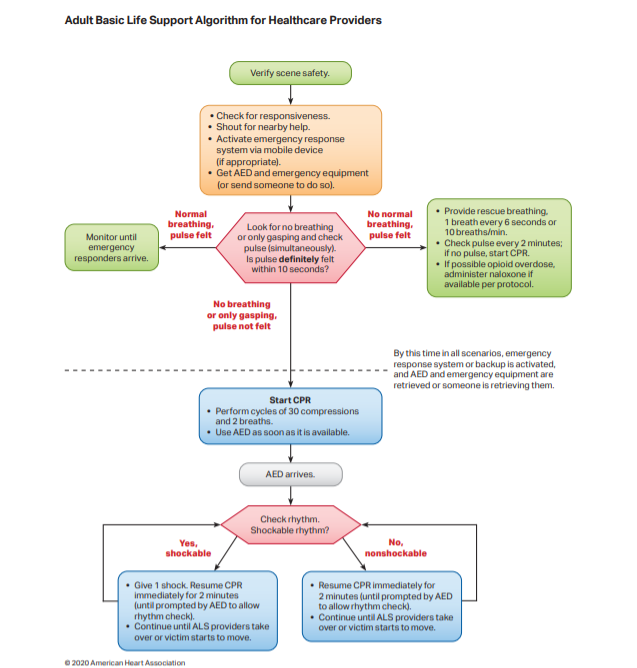

The responsive doesn't affect which path is followed, but we take it into consideration due to the mentor's petitions. What does inded affect the path is Breathing Status, Pulse and Defibrillator. Having that in mind, we'll asign a label to each combination of parameters; it'll be in pairs, since Responsive will create a pair for each one (again, because that pattern doesn't affect the chosen path).

In this way it'll be:

$\hspace{60mm}$Left path:

Response: 0  $\hspace{16mm}$  Response: 0 $\hspace{16mm}$  Response: 1 $\hspace{16mm}$  Response: 1


Breathing Status: 1  $\hspace{3mm}$  Breathing Status: 1 $\hspace{3mm}$  Breathing Status: 1 $\hspace{3mm}$  Breathing Status: 1


Pulse: 1  $\hspace{24mm}$  Pulse: 1 $\hspace{24mm}$  Pulse: 1 $\hspace{24mm}$  Pulse: 1


Defibrillator: 0  $\hspace{12mm}$  Defibrillator: 1  $\hspace{12mm}$  Defibrillator: 0  $\hspace{12mm}$  Defibrillator: 1

$\hspace{60mm}$Recommendation: 1


$\hspace{60mm}$Right path:

Response: 0  $\hspace{16mm}$  Response: 0 $\hspace{16mm}$  Response: 1 $\hspace{16mm}$  Response: 1


Breathing Status: 0  $\hspace{3mm}$  Breathing Status: 0 $\hspace{3mm}$  Breathing Status: 0 $\hspace{3mm}$  Breathing Status: 0


Pulse: 1  $\hspace{24mm}$  Pulse: 1 $\hspace{24mm}$  Pulse: 1 $\hspace{24mm}$  Pulse: 1


Defibrillator: 0  $\hspace{12mm}$  Defibrillator: 1  $\hspace{12mm}$  Defibrillator: 0  $\hspace{12mm}$  Defibrillator: 1


$\hspace{60mm}$Recommendation: 2


$\hspace{60mm}$Bottom left path:

Response: 0  $\hspace{16mm}$  Response: 1 


Breathing Status: 0  $\hspace{3mm}$  Breathing Status: 0 


Pulse: 0  $\hspace{24mm}$  Pulse: 0 


Defibrillator: 1  $\hspace{12mm}$  Defibrillator: 1  


$\hspace{60mm}$Recommendation: 3


$\hspace{60mm}$Bottom right path:

Response: 0  $\hspace{16mm}$  Response: 1 


Breathing Status: 0  $\hspace{3mm}$  Breathing Status: 0 


Pulse: 0  $\hspace{24mm}$  Pulse: 0 


Defibrillator: 0 $\hspace{12mm}$  Defibrillator: 0  


$\hspace{60mm}$Recommendation: 4

In [240]:
#Getting the data into a matrix
Data_matrix = Data.to_numpy()
Data_matrix

array([['unnormal', 'responsive', 'no', 'yes'],
       ['normal', 'responsive', 'yes', 'no'],
       ['unnormal', 'responsive', 'yes', 'no'],
       ...,
       ['responsive', 'unresponsive', 'yes', 'no'],
       ['responsive', 'unresponsive', 'no', 'yes'],
       ['responsive', 'responsive', 'yes', 'no']], dtype=object)

In [241]:
#Creating an array of outputs
output = []
#Following the paths
for i in range(0, len(Data['Breathing Status'])):
  
  #Left path
  if (Data_matrix[i, 0] == 'normal' and Data_matrix[i, 1] == 'unresponsive' and Data_matrix[i, 2] == 'yes' and Data_matrix[i, 3] == 'no') or (Data_matrix[i, 0] == 'normal' and Data_matrix[i, 1] == 'unresponsive' and Data_matrix[i, 2] == 'yes' and Data_matrix[i, 3] == 'yes') or (Data_matrix[i, 0] == 'normal' and Data_matrix[i, 1] == 'responsive' and Data_matrix[i, 2] == 'yes' and Data_matrix[i, 3] == 'no') or (Data_matrix[i, 0] == 'normal' and Data_matrix[i, 1] == 'responsive' and Data_matrix[i, 2] == 'yes' and Data_matrix[i, 3] == 'yes'):
    output.append('left')

  #Right path
  elif (Data_matrix[i, 0] == 'unnormal' and Data_matrix[i, 1] == 'unresponsive' and Data_matrix[i, 2] == 'yes' and Data_matrix[i, 3] == 'no') or (Data_matrix[i, 0] == 'unnormal' and Data_matrix[i, 1] == 'unresponsive' and Data_matrix[i, 2] == 'yes' and Data_matrix[i, 3] == 'yes') or (Data_matrix[i, 0] == 'unnormal' and Data_matrix[i, 1] == 'responsive' and Data_matrix[i, 2] == 'yes' and Data_matrix[i, 3] == 'no') or (Data_matrix[i, 0] == 'unnormal' and Data_matrix[i, 1] == 'responsive' and Data_matrix[i, 2] == 'yes' and Data_matrix[i, 3] == 'yes'):
    output.append('right')

  #Bottom left path
  elif (Data_matrix[i, 0] == 'unnormal' and Data_matrix[i, 1] == 'unresponsive' and Data_matrix[i, 2] == 'no' and Data_matrix[i, 3] == 'yes') or (Data_matrix[i, 0] == 'unnormal' and Data_matrix[i, 1] == 'responsive' and Data_matrix[i, 2] == 'no' and Data_matrix[i, 3] == 'yes'):
    output.append('bottomleft')

  #Bottom right path
  elif (Data_matrix[i, 0] == 'unnormal' and Data_matrix[i, 1] == 'unresponsive' and Data_matrix[i, 2] == 'no' and Data_matrix[i, 3] == 'no') or (Data_matrix[i, 0] == 'unnormal' and Data_matrix[i, 1] == 'responsive' and Data_matrix[i, 2] == 'no' and Data_matrix[i, 3] == 'no'):
    output.append('bottomright')

  else:
    output.append(np.nan)

#Adding the recommendations
Data['Recommendations'] = output

In [242]:
#Dropping the Nans
Data.dropna(inplace = True)
Data.reset_index(inplace = True)
Data.drop('index', axis = 1, inplace=True)
Data

,Breathing Status,Response,Pulse,Defibrillator,Recommendations
0,unnormal,responsive,no,yes,bottomleft
1,normal,responsive,yes,no,left
2,unnormal,responsive,yes,no,right
3,unnormal,unresponsive,no,yes,bottomleft
4,unnormal,unresponsive,no,yes,bottomleft
5,unnormal,responsive,yes,no,right
6,normal,responsive,yes,no,left
7,unnormal,responsive,no,yes,bottomleft
8,normal,responsive,yes,no,left
9,normal,responsive,yes,no,left


In [243]:
#Writing the dataset
Data.to_csv('Data.csv')

# Machine learning classification

Let's use Decision trees

In [244]:
#Encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
Data["Breathing Status"] = encoder.fit_transform(Data["Breathing Status"])
Data["Response"] = encoder.fit_transform(Data["Response"])
Data["Pulse"] = encoder.fit_transform(Data["Pulse"])
Data["Defibrillator"] = encoder.fit_transform(Data["Defibrillator"])
Data["Recommendations"] = encoder.fit_transform(Data["Recommendations"])

Data

,Breathing Status,Response,Pulse,Defibrillator,Recommendations
0,1,0,0,1,0
1,0,0,1,0,2
2,1,0,1,0,3
3,1,1,0,1,0
4,1,1,0,1,0
5,1,0,1,0,3
6,0,0,1,0,2
7,1,0,0,1,0
8,0,0,1,0,2
9,0,0,1,0,2


In [264]:
X = Data.iloc[:, 0:4].values
Y = Data.iloc[:, 4].values

In [265]:
X

array([[1, 0, 0, 1],
       [0, 0, 1, 0],
       [1, 0, 1, 0],
       ...,
       [1, 1, 1, 0],
       [1, 1, 0, 1],
       [1, 1, 1, 0]])

In [266]:
Y

array([0, 2, 3, 0, 0, 3, 2, 0, 2, 2, 3, 3, 3, 2, 2, 3, 2, 0, 3, 3, 2, 2,
       3, 3, 0, 2, 2, 2, 2, 2, 3, 3, 0, 3, 3, 2, 0, 0, 2, 3, 3, 3, 2, 0,
       3, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 0, 0, 2, 3, 2,
       2, 2, 3, 2, 2, 2, 0, 2, 2, 3, 3, 3, 3, 3, 2, 0, 2, 2, 3, 3, 0, 2,
       3, 2, 3, 0, 2, 2, 0, 2, 2, 2, 2, 3, 2, 2, 3, 3, 0, 3, 3, 0, 2, 3,
       2, 2, 0, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 0, 3, 0, 2, 0, 0, 0, 3, 3,
       3, 2, 2, 2, 3, 0, 2, 3, 0, 2, 3, 3, 3, 3, 2, 2, 0, 3, 2, 2, 3, 2,
       0, 0, 3, 2, 0, 0, 2, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 2, 0, 3, 3,
       2, 0, 3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0,
       0, 3, 0, 0, 3, 0, 3, 3, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 3, 3, 0, 3,
       3, 0, 0, 3, 0, 0, 3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0, 3, 0,
       3, 0, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 0, 0, 3, 3, 3, 0, 3,
       0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 0, 0,
       3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 0, 0, 3, 1, 2,

In [267]:
#Importing the packages
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [268]:
#Spliting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

Using gini

In [269]:
#Creating the classifier object
clf_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_depth = 3, min_samples_leaf = 5) #Default criteria

In [270]:
#Performing the training
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [271]:
#Prediction on test with giniIndex
y_pred_gini = clf_gini.predict(X_test)

In [272]:
#Showing the results
print('Confusion matrix:', confusion_matrix(y_test, y_pred_gini), sep = '\n', end = '\n\n')
    
print('Accuracy:', accuracy_score(y_test, y_pred_gini)*100, sep = '\n', end = '\n\n')
    
print('Report:', classification_report(y_test, y_pred_gini), sep = '\n', end = '\n\n')

Confusion matrix:
[[82  0  0  0]
 [ 0  6  0  0]
 [ 0  0 35  0]
 [ 0  0  0 93]]

Accuracy:
100.0

Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        93

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216




Now using entropy

In [273]:
#Creating the classifier object
clf_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state = 100, max_depth = 3, min_samples_leaf = 5) #Default criteria

In [274]:
#Performing the training
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [275]:
#Prediction on test with giniIndex
y_pred_entropy = clf_gini.predict(X_test)

In [276]:
#Showing the results
print('Confusion matrix:', confusion_matrix(y_test, y_pred_gini), sep = '\n', end = '\n\n')
    
print('Accuracy:', accuracy_score(y_test, y_pred_gini)*100, sep = '\n', end = '\n\n')
    
print('Report:', classification_report(y_test, y_pred_gini), sep = '\n', end = '\n\n')

Confusion matrix:
[[82  0  0  0]
 [ 0  6  0  0]
 [ 0  0 35  0]
 [ 0  0  0 93]]

Accuracy:
100.0

Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        93

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216


